#Sonja's run of the data through models

#1. unsupervised learning - clusters using K means



In [1]:
# importing initial libaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

In [3]:
# read in CSV file to use for DataFrame
denver_df = pd.read_csv("merged_transformed.csv")

# Add a 'city' column
#denver_df['city'] = 'Denver'

# Check dataframe
denver_df.head()

,id,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,...,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city,bath_number,bath_text,listing_geometry,attraction1,attract1_geometry
0,360,-0.602663,0.025287,-0.271813,-0.094036,-0.573596,0.096598,0.428366,-0.218381,1.183338,...,5.00,4.91,f,2.87,Denver,1.0,bath,POINT (-105.0020980834961 39.76641464233398),union_station,POINT (-105 39.75305556)
1,364,-0.602663,-0.891740,-0.893865,-0.052068,1.457293,1.422754,1.283318,1.452154,0.245294,...,4.65,4.71,f,0.50,Denver,1.5,baths,POINT (-104.97906 39.76672),union_station,POINT (-105 39.75305556)
2,31503,-0.981756,-0.891740,-0.893865,-0.087906,0.281515,0.861688,0.921607,1.365065,0.979416,...,4.88,4.88,f,1.00,Denver,1.0,bath,POINT (-105.02845 39.76179),union_station,POINT (-105 39.75305556)
3,39405,-0.981756,-0.891740,-0.893865,-0.072345,-0.359818,-0.923521,-0.393704,-0.479649,6.159055,...,4.85,4.85,f,4.17,Denver,1.0,bath,POINT (-105.0030781546276 39.76605337851223),union_station,POINT (-105 39.75305556)
4,154999,-0.981756,-0.891740,-0.893865,-0.060085,-1.001152,-1.280563,-1.445953,-0.281719,-0.529613,...,4.90,4.60,f,0.07,Denver,1.0,bath,POINT (-104.98927 39.74439),union_station,POINT (-105 39.75305556)


In [8]:
denver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3844 non-null   int64  
 1   num__accommodates                 3844 non-null   float64
 2   num__bedrooms                     3844 non-null   float64
 3   num__beds                         3831 non-null   float64
 4   num__price                        3844 non-null   float64
 5   num__availability_30              3844 non-null   float64
 6   num__availability_60              3844 non-null   float64
 7   num__availability_90              3844 non-null   float64
 8   num__availability_365             3844 non-null   float64
 9   num__number_of_reviews            3844 non-null   float64
 10  num__number_of_reviews_ltm        3844 non-null   float64
 11  num__number_of_reviews_l30d       3844 non-null   float64
 12  num__r

In [13]:
#subset DF to remove string columns - after getting error from KMeans about having strings in the DF
# Identify non-string (e.g., numeric) columns
non_string_columns = denver_df.select_dtypes(exclude=['object']).columns

# Subset the DataFrame to keep only non-string columns
df_subset = denver_df[non_string_columns]

#display
df_subset.head()


,id,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bath_number
0,360,-0.602663,0.025287,-0.271813,-0.094036,-0.573596,0.096598,0.428366,-0.218381,1.183338,...,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,2.87,1.0
1,364,-0.602663,-0.891740,-0.893865,-0.052068,1.457293,1.422754,1.283318,1.452154,0.245294,...,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,0.50,1.5
2,31503,-0.981756,-0.891740,-0.893865,-0.087906,0.281515,0.861688,0.921607,1.365065,0.979416,...,3,4.91,4.92,5.00,4.95,4.99,4.88,4.88,1.00,1.0
3,39405,-0.981756,-0.891740,-0.893865,-0.072345,-0.359818,-0.923521,-0.393704,-0.479649,6.159055,...,3,4.92,4.88,4.93,4.98,4.97,4.85,4.85,4.17,1.0
4,154999,-0.981756,-0.891740,-0.893865,-0.060085,-1.001152,-1.280563,-1.445953,-0.281719,-0.529613,...,0,4.70,4.40,4.70,4.70,4.90,4.90,4.60,0.07,1.0


In [20]:
#remove null values -KMeans can't use null
null_counts = df_subset.isnull().sum().sort_values(ascending=False)
null_counts_over0 = null_counts[null_counts > 0]
print(null_counts_over0)

beds                                13
num__beds                           13
bath_number                          2
num__review_scores_accuracy          2
num__bath_number                     2
num__review_scores_value             2
num__review_scores_location          2
num__review_scores_communication     2
num__review_scores_checkin           2
num__review_scores_cleanliness       2
review_scores_accuracy               2
review_scores_cleanliness            2
review_scores_checkin                2
review_scores_communication          2
review_scores_location               2
review_scores_value                  2
dtype: int64


In [21]:
df_nulls_removed = df_subset.dropna()
df_nulls_removed.head()

,id,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bath_number
0,360,-0.602663,0.025287,-0.271813,-0.094036,-0.573596,0.096598,0.428366,-0.218381,1.183338,...,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,2.87,1.0
1,364,-0.602663,-0.891740,-0.893865,-0.052068,1.457293,1.422754,1.283318,1.452154,0.245294,...,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,0.50,1.5
2,31503,-0.981756,-0.891740,-0.893865,-0.087906,0.281515,0.861688,0.921607,1.365065,0.979416,...,3,4.91,4.92,5.00,4.95,4.99,4.88,4.88,1.00,1.0
3,39405,-0.981756,-0.891740,-0.893865,-0.072345,-0.359818,-0.923521,-0.393704,-0.479649,6.159055,...,3,4.92,4.88,4.93,4.98,4.97,4.85,4.85,4.17,1.0
4,154999,-0.981756,-0.891740,-0.893865,-0.060085,-1.001152,-1.280563,-1.445953,-0.281719,-0.529613,...,0,4.70,4.40,4.70,4.70,4.90,4.90,4.60,0.07,1.0


In [22]:
df_nulls_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3827 entries, 0 to 3843
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3827 non-null   int64  
 1   num__accommodates                 3827 non-null   float64
 2   num__bedrooms                     3827 non-null   float64
 3   num__beds                         3827 non-null   float64
 4   num__price                        3827 non-null   float64
 5   num__availability_30              3827 non-null   float64
 6   num__availability_60              3827 non-null   float64
 7   num__availability_90              3827 non-null   float64
 8   num__availability_365             3827 non-null   float64
 9   num__number_of_reviews            3827 non-null   float64
 10  num__number_of_reviews_ltm        3827 non-null   float64
 11  num__number_of_reviews_l30d       3827 non-null   float64
 12  num__review

<Axes: xlabel='price', ylabel='review_scores_rating'>

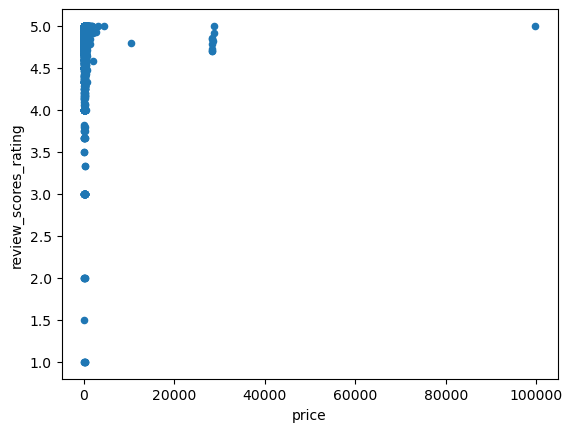

In [23]:
#visualize a scatter plot of data comparing price to  review_scores_rating
df_nulls_removed.plot.scatter(x="price",
                       y="review_scores_rating")

In [ ]:
#re-run but with outliers removed
#requested file

In [27]:
#Run K-means model
model = KMeans(n_clusters=5, n_init="auto", random_state=1)
#print model
model

KMeans(n_clusters=5, n_init='auto', random_state=1)

In [28]:
#fit the data to the model
model.fit(df_nulls_removed)


KMeans(n_clusters=5, n_init='auto', random_state=1)

In [30]:
#make predictions
prediction = model.predict(df_nulls_removed)

#print predictions
print(prediction)

[0 0 0 ... 3 3 3]


In [31]:
#copy of dataframe
df_nulls_removed_predictions = df_nulls_removed.copy()
#add a column to df to contain prediction  
df_nulls_removed["prediction"] = prediction
#review dataframe
df_nulls_removed.head()

/var/folders/jj/dm8tbcj11273_w688qyz4jmh0000gp/T/ipykernel_43798/1698748434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nulls_removed["prediction"] = prediction


,id,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bath_number,prediction
0,360,-0.602663,0.025287,-0.271813,-0.094036,-0.573596,0.096598,0.428366,-0.218381,1.183338,...,4.99,4.99,4.96,5.00,5.00,5.00,4.91,2.87,1.0,0
1,364,-0.602663,-0.891740,-0.893865,-0.052068,1.457293,1.422754,1.283318,1.452154,0.245294,...,4.85,4.78,4.81,4.95,4.96,4.65,4.71,0.50,1.5,0
2,31503,-0.981756,-0.891740,-0.893865,-0.087906,0.281515,0.861688,0.921607,1.365065,0.979416,...,4.91,4.92,5.00,4.95,4.99,4.88,4.88,1.00,1.0,0
3,39405,-0.981756,-0.891740,-0.893865,-0.072345,-0.359818,-0.923521,-0.393704,-0.479649,6.159055,...,4.92,4.88,4.93,4.98,4.97,4.85,4.85,4.17,1.0,0
4,154999,-0.981756,-0.891740,-0.893865,-0.060085,-1.001152,-1.280563,-1.445953,-0.281719,-0.529613,...,4.70,4.40,4.70,4.70,4.90,4.90,4.60,0.07,1.0,0


In [34]:
#write to csv, to determine the grouping definition
df_nulls_removed.to_csv("test.csv",index=False)

<Axes: xlabel='price', ylabel='review_scores_rating'>

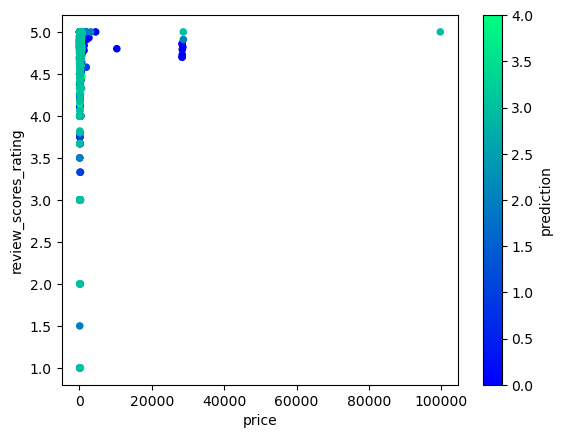

In [33]:
#plot the data points based on prediction
df_nulls_removed.plot.scatter(
    x= "price",
    y= "review_scores_rating",
    c= "prediction",
    colormap = "winter")


In [ ]:
#######

Starting the classification code: going to run k-means and PCA but should I run others?  Will update this box as I decide.

In [17]:
# Import the kmeans, PCA module
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [18]:
# I need to make certain that for this analysis there are no nulls 
# I would rather not impute nor dropna but that seems to be what I need to do 
# I will dropna for now and then create a new dataframe for unsupervised learning area

# df_cleaned = df.dropna() -- if I wanted to just drop a bunch and rename into a new dataframe

# creating a probably redundant 'columns_to_use' to include in PCA - this is incase we change the DF
columns_to_use = ['num__accommodates',
'num__bedrooms',
'num__beds',
'num__price',
'num__availability_30',
'num__availability_60',
'num__availability_90',
'num__availability_365',
'num__number_of_reviews',
'num__number_of_reviews_ltm',
'num__number_of_reviews_l30d',
'num__review_scores_rating',
'num__review_scores_accuracy',
'num__review_scores_cleanliness',
'num__review_scores_checkin',
'num__review_scores_communication',
'num__review_scores_location',
'num__review_scores_value',
'num__reviews_per_month',
'num__bath_number',
'bool__host_is_superhost_f',
'bool__host_is_superhost_t',
'bool__host_is_superhost_nan',
'bool__host_has_profile_pic_t',
'bool__host_identity_verified_t',
'bool__has_availability_t',
'bool__instant_bookable_t']


# Select the my columns to us which is sort of redundant in this code but sets us up 
# if we want to include more variables in the overall analysis  and reduce it here
df_selected = denver_transformed_df[columns_to_use]

# because I did not want to just blanket dropna above in the full DF I am dropping them now
df_selected_no_null = df_selected.dropna()

# Hold here with the standardscaler if we do not use the transformed data from above
# scaler = StandardScaler()
#df_standardized = pd.DataFrame(scaler.fit_transform(df_selected_no_null), columns=df_selected_no_null.columns)

# Apply PCA - if I have to run standardscaler here again then <df_selected_no_null> would be replaced with <df_standardized>
# this next bit of code comes from ChatGPT and Stackoverflow - this is not hardcoded
# https://stackoverflow.com/questions/46516469/principal-component-analysis-how-many-components

num_components = min(len(columns_to_use), len(df_selected_no_null) - 1)  
pca = PCA(n_components=num_components)
df_pca_result = pd.DataFrame(pca.fit_transform(df_selected_no_null), columns=[f'PC{i}' for i in range(1, num_components + 1)])

# If I would like to guess at the number of segments run this: 
# pca=PCA(n_components=6)
# df_pca_result = pca.fit_transform(df_selected_no_null)
# df_pca_result[:5]


# Concatenate the PCA results with denver_transformed_df
df_pca_result = pd.concat([denver_transformed_df.reset_index(drop=True), df_pca_result], axis=1)

# Display or use df_pca_results 
print(df_pca_result)

      num__accommodates  num__bedrooms  num__beds  num__price  \
0             -0.438015       0.036643   -0.14478   -0.089186   
1             -0.438015      -0.881270   -0.78167   -0.039893   
2             -0.438015            NaN   -0.78167   -0.103586   
3             -0.822197            NaN   -0.78167   -0.107463   
4             -0.822197            NaN   -0.14478   -0.120756   
...                 ...            ...        ...         ...   
5383           3.787981       1.872468    1.76589    0.211002   
5384          -0.438015       0.954555    0.49211   -0.086417   
5385          -0.822197      -0.881270   -0.78167   -0.061493   
5386          -0.822197      -0.881270   -0.78167   -0.100263   
5387          -0.822197      -0.881270    0.49211   -0.070909   

      num__availability_30  num__availability_60  num__availability_90  \
0                -0.631171             -0.002604              0.331489   
1                 1.224227              1.246766              1.153714 

In [19]:
# Calculate the PCA explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Display or use explained_variance_ratio as needed
print(explained_variance_ratio)

[2.13807025e-01 1.76567152e-01 1.49580512e-01 1.23352041e-01
 6.95622705e-02 3.28935336e-02 3.13465743e-02 2.99715833e-02
 2.93468276e-02 2.15921026e-02 1.88211051e-02 1.54187781e-02
 1.27477647e-02 1.10477233e-02 1.00136547e-02 9.40703298e-03
 8.75319859e-03 8.01624067e-03 7.98629459e-03 5.99397288e-03
 5.80298425e-03 4.82102697e-03 1.72208600e-03 8.62066348e-04
 3.84977038e-04 1.81473086e-04 4.21660007e-32]


In [20]:
# summing the explained variance 
explained_denver = explained_variance_ratio.sum()

# Display 
print(explained_denver)

0.9999999999999999


So with 26 different components we can explain 99.9999% of the variance but now to reduce to something manageable  

In [21]:
# just looking at the data to make certain I have it all
df_pca_result.tail()

,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
5383,3.787981,1.872468,1.76589,0.211002,1.907795,1.583135,1.375082,0.671803,-0.560294,-0.665727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5384,-0.438015,0.954555,0.49211,-0.086417,1.224227,1.246766,1.153714,0.617480,-0.560294,-0.665727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5385,-0.822197,-0.881270,-0.78167,-0.061493,1.614837,1.438976,1.280210,0.648522,-0.560294,-0.665727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5386,-0.822197,-0.881270,-0.78167,-0.100263,1.907795,1.583135,1.375082,0.671803,-0.560294,-0.665727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5387,-0.822197,-0.881270,0.49211,-0.070909,0.833617,1.054555,1.027218,1.323679,-0.560294,-0.665727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Create the denver PCA DataFrame as a seperate view
denver_pca_df = pd.DataFrame(
    df_pca_result,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12",
             "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20", "PC21", "PC22", "PC23", "PC24",
             "PC25", "PC26"])

# Review the PCA DataFrame
denver_pca_df.tail()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
5383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# darn null values just don't work with unsupervised learning deleting them
denver_pca_no_null = df_pca_result.dropna()


In [24]:
# Check for missing values 
missing_values = denver_pca_no_null.isnull().sum()

# Print the columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [25]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 26))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(denver_pca_no_null)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(26)

,k,inertia
0,1,112462.014807
1,2,105659.097447
2,3,99598.662218
3,4,91614.089602
4,5,86830.472022
5,6,82371.553424
6,7,78817.337223
7,8,73876.955517
8,9,70741.408417
9,10,68324.161231


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

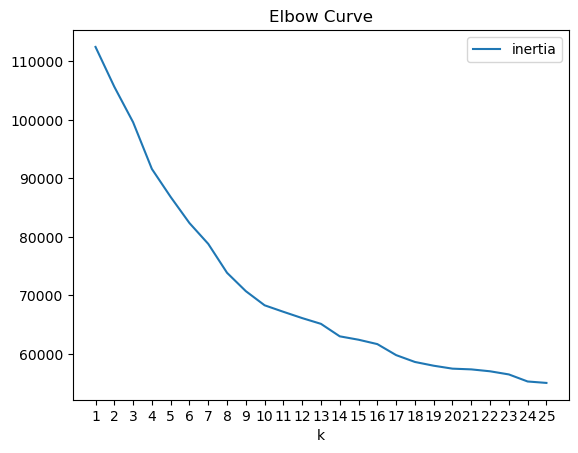

In [26]:
 # Plotting my inertia and k
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [29]:
# Define the model Kmeans model... which sucks because it could be 10 or 14
model = KMeans(n_clusters=10, n_init='auto', random_state=0)

# Fit the model
model.fit(denver_pca_no_null)

# Make predictions
k_10 = model.predict(denver_pca_no_null)

# Create a copy of the customers_pca_df DataFrame
denver_pca_predictions_df_10 = denver_pca_no_null.copy()

# Add a class column with the labels
denver_pca_predictions_df_10["customer_segments"] = k_10

<Axes: xlabel='PC1', ylabel='PC2'>

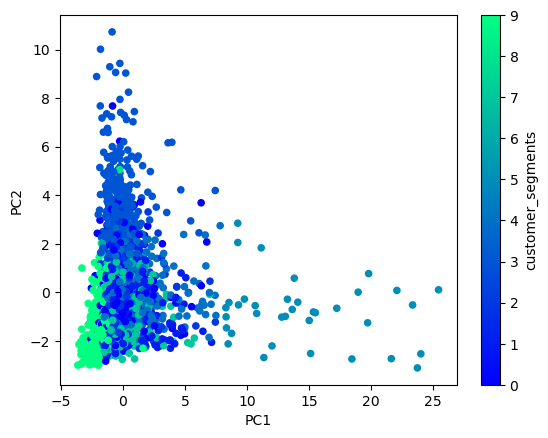

In [30]:
# Plot the clusters
denver_pca_predictions_df_10.plot.scatter(
    x="PC1",
    y="PC2",
    c="customer_segments",
    colormap='winter')

In [ ]:
# Define the model Kmeans model... hold to try more
model = KMeans(n_clusters=7, n_init='auto', random_state=0)

# Fit the model
model.fit(denver_pca_no_null)

# Make predictionsy others
k_7 = model.predict(denver_pca_no_null)

# Create a copy of the customers_pca_df DataFrame
denver_pca_predictions_df_7 = denver_pca_no_null.copy()

# Add a class column with the labels
denver_pca_predictions_df_7["customer_segments"] = k_7

In [ ]:
# hold to try more
denver_pca_predictions_df_7.plot.scatter(
    x="PC1",
    y="PC2",
    c="customer_segments",
    colormap='winter')

# note I don't like this one

<Axes: xlabel='num__price', ylabel='num__beds'>

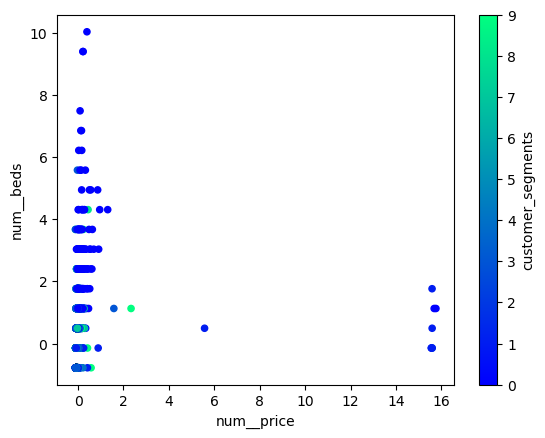

In [32]:
# Plot the clusters using price and if it is available 30 days out - I should probably work on this more 
denver_pca_predictions_df_10.plot.scatter(
    x="num__price",
    y="num__beds",
    c="customer_segments",
    colormap='winter')

In [ ]:
# looking at what weight more 
pca_component_weights = pd.DataFrame(pca.components_.T, columns=[
    "num__accommodates", "num__bedrooms", "num__beds", "num__price", "num__availability_30", "num__availability_60",
    "num__availability_90", "num__availability_365", "num__number_of_reviews", "num__number_of_reviews_ltm",
    "num__number_of_reviews_l30d", "num__review_scores_rating", "num__review_scores_accuracy",
    "num__review_scores_cleanliness", "num__review_scores_checkin", "num__review_scores_communication",
    "num__review_scores_location", "num__review_scores_value", "num__reviews_per_month",
    "bool__host_is_superhost_f", "bool__host_is_superhost_t", "bool__host_is_superhost_nan",
    "bool__host_has_profile_pic_t", "bool__host_identity_verified_t", "bool__has_availability_t",
    "bool__instant_bookable_t", "PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12",
    "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20", "PC21", "PC22", "PC23", "PC24", "PC25", "PC26"], index=denver_pca_no_null.columns)
pca_component_weights